# Weighted Histogram Analysis Method (WHAM) for free energy calculations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def flat(x_vals):
    return np.zeros_like(x_vals)

def w_shape(x_vals):
    return x_vals**4 - 0.85*x_vals**2

def barrier(x_vals):
    return 100*x_vals**4 - 100*x_vals**2

class Dynamics():
    def __init__(self, fes_func):
        self.x_vals = np.linspace(-1,1,100)
        self.fes_func = fes_func
        self.underlying_fes = fes_func(self.x_vals)
        
        self.boltz_weights = np.exp(-self.underlying_fes)

        self.underlying_prob_dist = self.boltz_weights / np.sum(self.boltz_weights)

    def dynamics(self,nsteps):
        x_index = np.random.randint(0,len(self.x_vals))
        # x_index = np.where(self.underlying_fes == self.underlying_fes.min())[0][0]
        coord = self.x_vals[x_index]
        self.time = [0]
        self.trajectory = [coord]
        num_acceptances = 0

        for i in range(nsteps):
            rand = np.random.rand()
            self.time.append(i+1)
            
            if rand >= 0.5:
                # Impose PBC
                if (x_index + 1) == 100:
                    trial_index = 0

                else:
                    trial_index = x_index + 1

                trans_prob = self.boltz_weights[trial_index] / self.boltz_weights[x_index]
                if trans_prob >= np.random.rand():
                    x_index = trial_index
                    num_acceptances += 1

            else:
                # Impose PBC
                if (x_index - 1) == -1:
                    trial_index = 99

                else:
                    trial_index = x_index - 1

                trans_prob = self.boltz_weights[trial_index] / self.boltz_weights[x_index]
                if trans_prob >= np.random.rand():
                    x_index = trial_index
                    num_acceptances += 1

            coord = self.x_vals[x_index]
            
            self.trajectory.append(coord)
        
        self.acceptance_prob = num_acceptances / nsteps

# class Umbrella_sampling():
#     def __init__(self,numbrellas,kappa,fes_func):
#         self.replicas = []
#         for i in range(numbrellas):
#             replica_window = Dynamics(self.harmonic_restraints)
    
#     def harmonic_restraints(x_vals,center,kappa,fes_func):
#         return 0.5 * kappa * (x_vals - center)**2 + fes_func(x_vals)



0.8435926


(-1.0, 1.0)

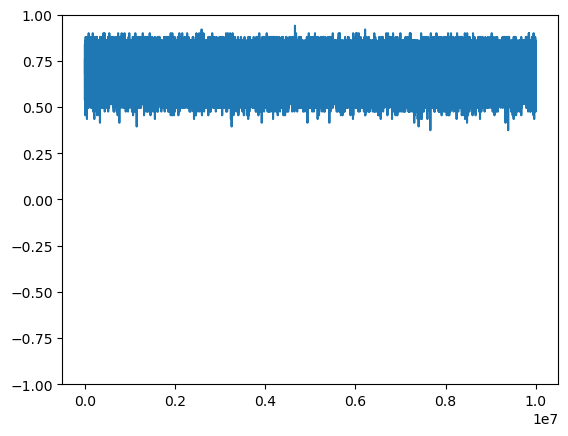

In [97]:
dyn = Dynamics(barrier)
dyn.dynamics(10000000)

print(dyn.acceptance_prob)
plt.plot(dyn.time,dyn.trajectory)
plt.ylim(-1,1)


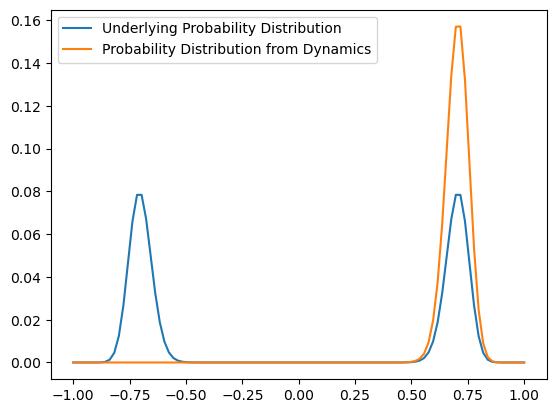

In [109]:
hist, _ = np.histogram(dyn.trajectory,range=(-1,1),bins=100)

prob_hist = hist/hist.sum()

plt.plot(dyn.x_vals,dyn.underlying_prob_dist,label='Underlying Probability Distribution')
plt.plot(dyn.x_vals,prob_hist,label='Probability Distribution from Dynamics')
plt.legend()

/tmp/ipykernel_3488/1052314490.py:1: RuntimeWarning: divide by zero encountered in log
  sampled_fes = -np.log(prob_hist)


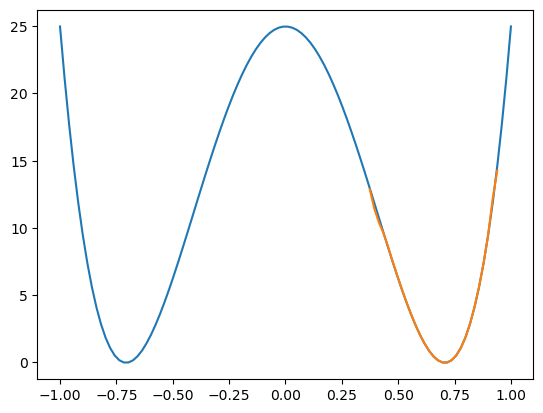

In [110]:
sampled_fes = -np.log(prob_hist)
plt.plot(dyn.x_vals,dyn.underlying_fes-dyn.underlying_fes.min())
plt.plot(dyn.x_vals,sampled_fes-sampled_fes.min())